# 1. Import necessary libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from google.colab import drive

# 2. Mount Google Drive

In [13]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 3. Load the dataset

In [30]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/winequality-white.csv')
df

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
3,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
4,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
...,...
4893,6.2;0.21;0.29;1.6;0.039;24;92;0.99114;3.27;0.5...
4894,6.6;0.32;0.36;8;0.047;57;168;0.9949;3.15;0.46;...
4895,6.5;0.24;0.19;1.2;0.041;30;111;0.99254;2.99;0....
4896,5.5;0.29;0.3;1.1;0.022;20;110;0.98869;3.34;0.3...


# 4. Data Preprocessing

In [27]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/winequality-white.csv', delimiter=';')
df
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

df.fillna(df.mean(), inplace=True)
df = pd.get_dummies(df, drop_first=True)

# 5. Check for outliers using Boxplot

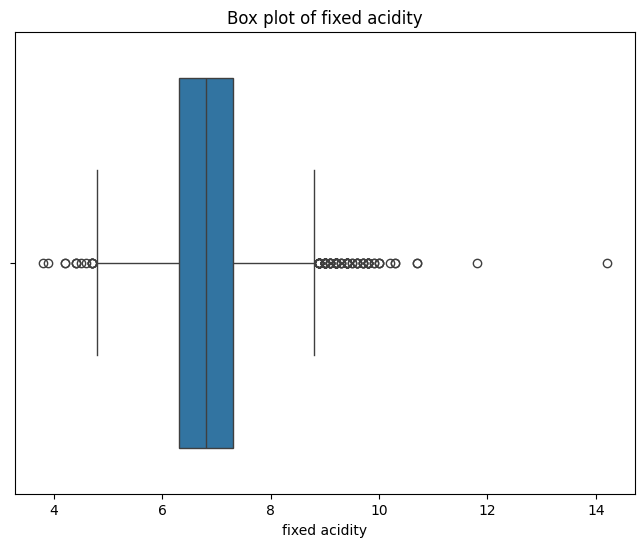

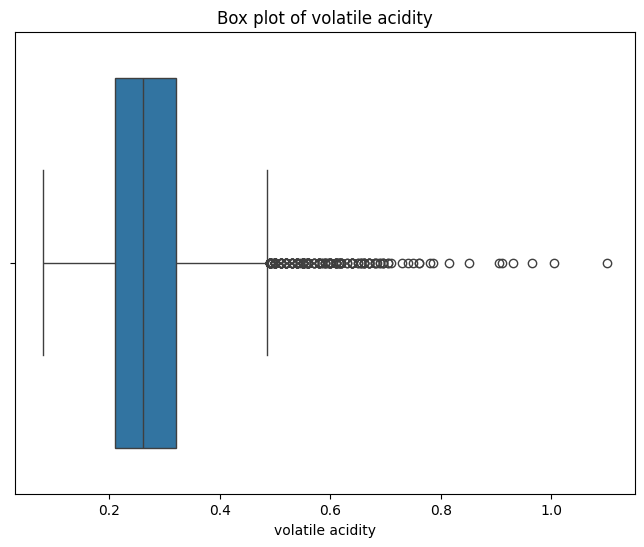

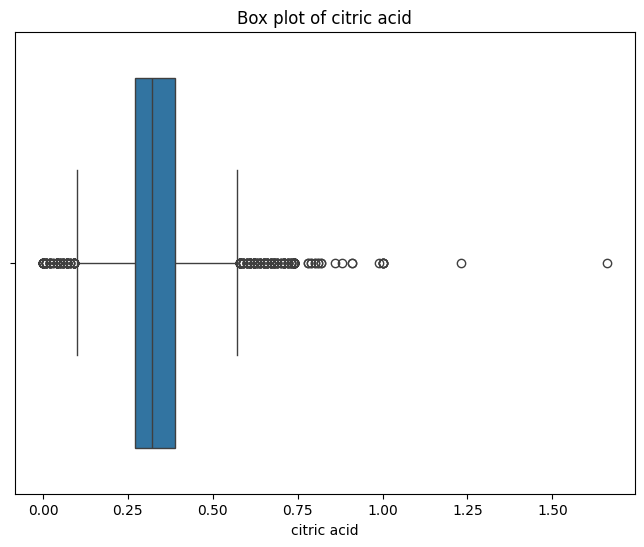

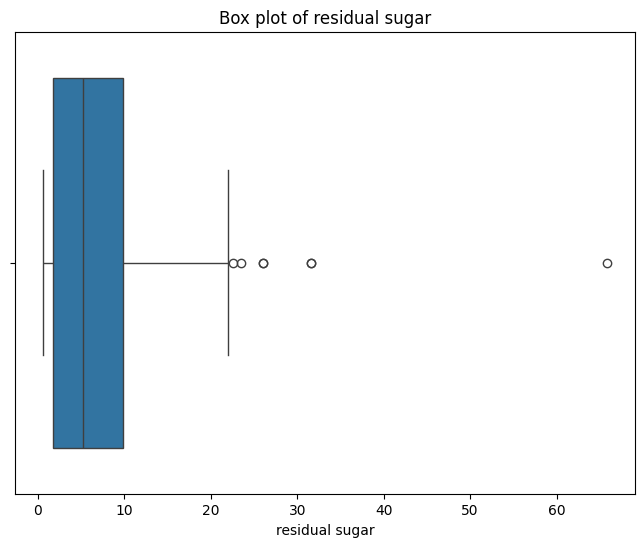

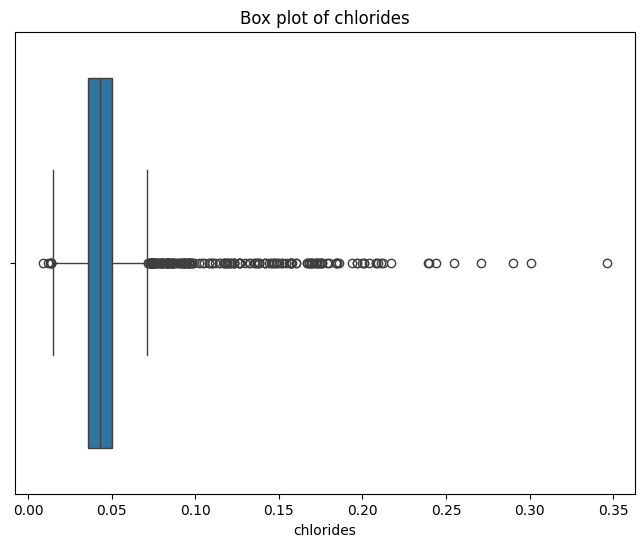

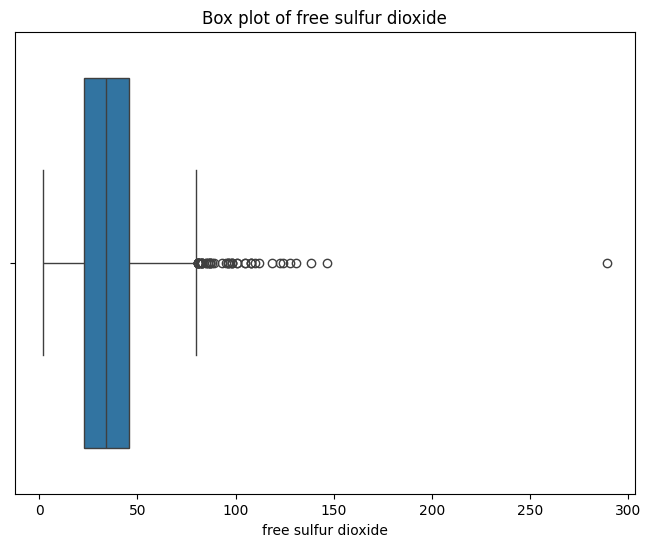

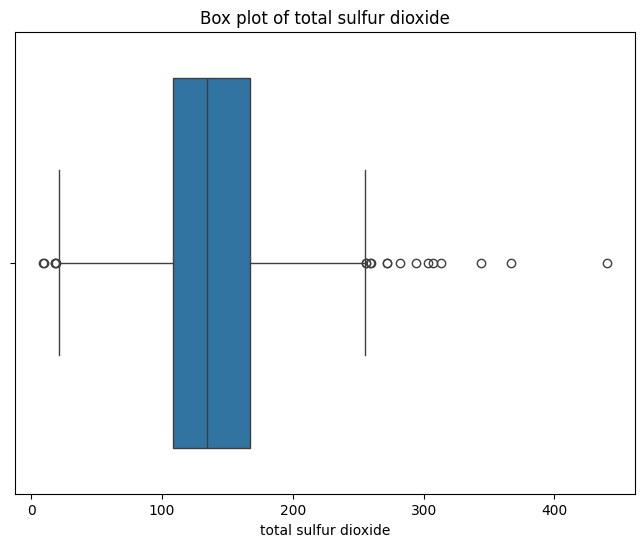

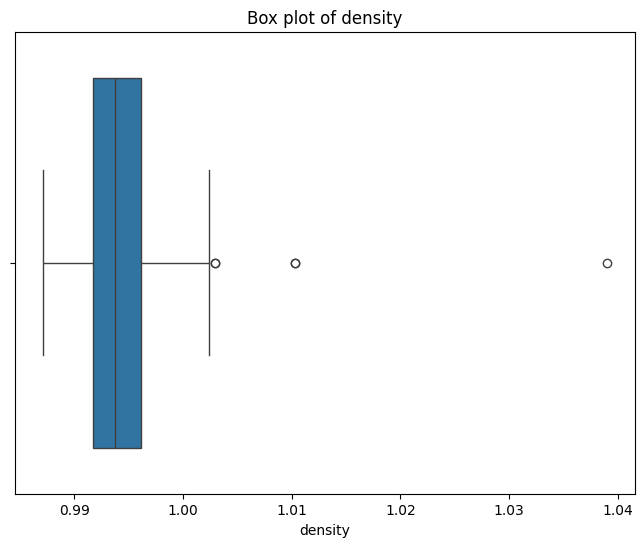

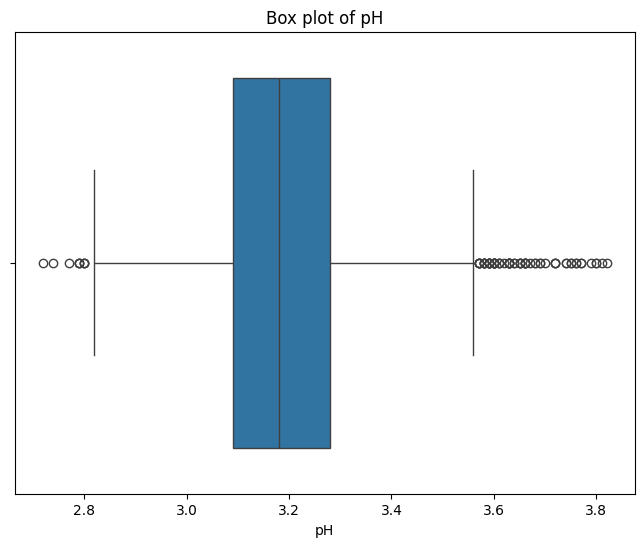

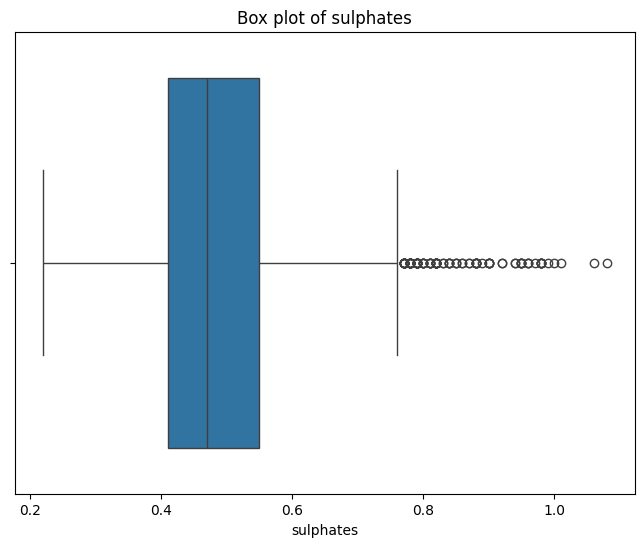

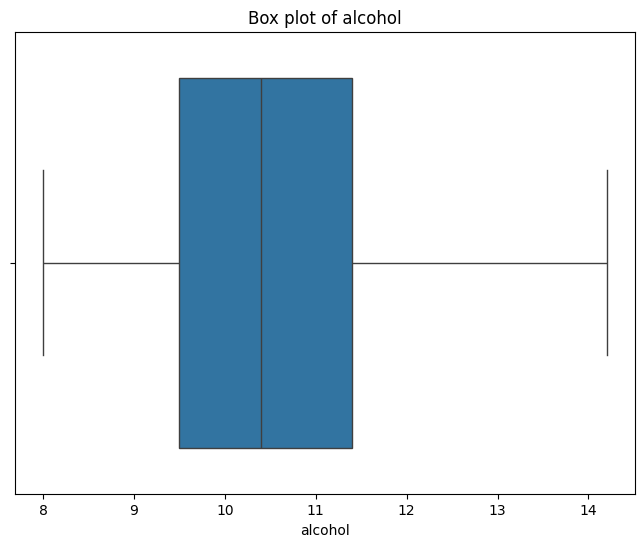

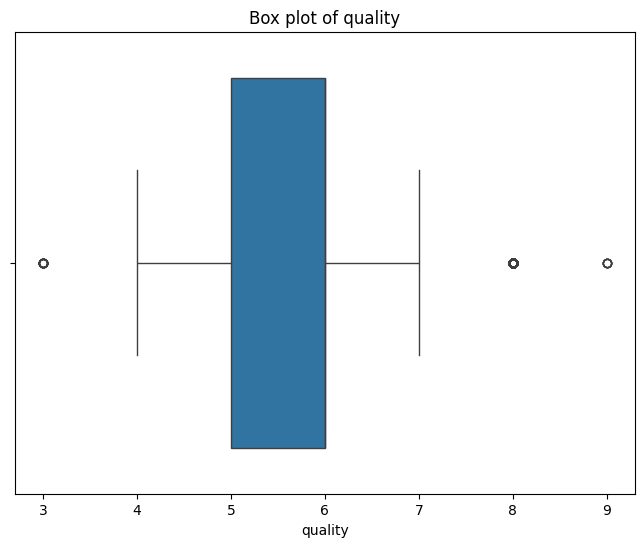

In [18]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    if pd.api.types.is_numeric_dtype(df[col]):
        sns.boxplot(x=df[col])
        plt.title(f'Box plot of {col}')
        plt.show()

# 6. Feature Scaling using StandardScaler

In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('quality', axis=1))

# 7. Apply ANOVA for Feature Selection

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt
import seaborn as sns

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('quality', axis=1))

X = scaled_features
y = df['quality']

f_values, p_values = f_classif(X, y)
anova_df = pd.DataFrame({
    'Feature': df.drop('quality', axis=1).columns,
    'F-Statistic': f_values,
    'P-Value': p_values
})
anova_df.sort_values(by='P-Value', ascending=True, inplace=True)
print(anova_df)

# 8. Select features based on P-Value threshold

In [23]:
threshold = 0.05
selected_features = anova_df[anova_df['P-Value'] < threshold]['Feature']

# 9. Train and test the classifier

In [24]:
X_selected = df[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


# 10. Classifier - Logistic Regression

In [25]:
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

# 11. Evaluate the Classifier

In [26]:
y_pred = classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5071428571428571
Classification Report:
              precision    recall  f1-score   support

           3       0.50      0.20      0.29         5
           4       0.00      0.00      0.00        25
           5       0.56      0.50      0.53       291
           6       0.49      0.74      0.59       432
           7       0.47      0.15      0.23       192
           8       0.00      0.00      0.00        35

    accuracy                           0.51       980
   macro avg       0.34      0.27      0.27       980
weighted avg       0.48      0.51      0.46       980



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
